Land and marine-terminating glaciers result in the generation of infrasound waves. Intuitively, we assume that terminating glaciers are a result of changes in climate factors. Therefore, there should be an explanatory relationship between our climate variables and the infrasound signals. Even though there may not be a direct causal relation between the climate variables and the signals, what we imply is that:

$$
P(\text{signal}(t) = a \mid \text{glacier}(t), \text{variables}(t)) = P(\text{signal}(t) = a \mid \text{glacier}(t))
$$

In this dataset, we don't have direct access to quantitative data that can characterize the exact state of terminating glaciers, so we cannot fully verify this. However, we can hypothesize a linear (or monotonic) relationship between glacier activity and the infrasound signals. Hence, we aim to classify whether there is a variation in glacier activity at time \( t \) by observing whether the infrasound signal is non-zero at that time.

The intuitive threshold is to distinguish between an infrasound signal being zero or non-zero. In the following sections, we will attempt to justify this assumption through statistical analysis of the data.


In [1]:
import pandas as pd 
import numpy as np

In [23]:
features = pd.read_csv('data_Features.csv')
target = pd.read_csv('data_Targets.csv')

In [24]:
features.shape, target.shape

((2556, 11), (2556, 5))

In [28]:
features['Y1']=target['Y1']

In [29]:
features.head()

,time,t2m,u10,v10,SST,SIC,r1_MAR,r2_MAR,r3_MAR,r4_MAR,r5_MAR,Y1
0,2013-01-01,-21.926931,-0.973994,3.149094,-1.690511,90.745710,0.034537,0.033345,0.0,0.0,0.0,0
1,2013-01-02,-23.696195,-6.502908,2.494894,-1.690511,88.502980,0.034527,0.033326,0.0,0.0,0.0,0
2,2013-01-03,-25.644027,-3.557411,1.025486,-1.689860,88.734091,0.034523,0.033321,0.0,0.0,0.0,0
3,2013-01-04,-23.566887,-1.888075,-3.486122,-1.690511,89.149576,0.034509,0.033306,0.0,0.0,0.0,0
4,2013-01-05,-22.897768,-2.748844,-3.491206,-1.689860,91.613955,0.034492,0.033290,0.0,0.0,0.0,0


In [30]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2556 entries, 0 to 2555
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   time    2556 non-null   object 
 1   t2m     2556 non-null   float64
 2   u10     2556 non-null   float64
 3   v10     2556 non-null   float64
 4   SST     2556 non-null   float64
 5   SIC     2556 non-null   float64
 6   r1_MAR  2556 non-null   float64
 7   r2_MAR  2556 non-null   float64
 8   r3_MAR  2556 non-null   float64
 9   r4_MAR  2556 non-null   float64
 10  r5_MAR  2556 non-null   float64
 11  Y1      2556 non-null   int64  
dtypes: float64(10), int64(1), object(1)
memory usage: 239.8+ KB


In [32]:
features.describe()

,t2m,u10,v10,SST,SIC,r1_MAR,r2_MAR,r3_MAR,r4_MAR,r5_MAR,Y1
count,2556.000000,2556.000000,2556.000000,2556.000000,2556.000000,2556.000000,2556.000000,2556.000000,2556.000000,2556.000000,2556.000000
mean,-10.190040,0.139648,0.626351,-0.858922,73.267808,18.789275,11.522362,1.328740,4.382248,5.191286,3.525430
std,10.340583,5.013640,3.955417,1.446165,29.250724,47.703600,27.942124,3.393452,12.971518,13.406972,18.977537
min,-32.019122,-13.846656,-12.316128,-1.692462,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-19.877500,-3.610168,-2.079422,-1.689860,70.000000,0.123798,0.121437,0.000000,0.000000,0.000000,0.000000
50%,-9.596479,-0.187084,0.912780,-1.689860,84.601769,0.481870,0.481870,0.000000,0.000000,0.000000,0.000000
75%,0.167824,3.807440,3.483397,-0.297573,90.362319,4.080174,3.961181,0.004413,0.010148,0.000150,0.000000
max,7.840619,14.640913,12.811255,6.054536,99.500682,479.722174,281.673389,23.241791,115.876574,88.054318,433.000000


In [33]:
features['Y1'].value_counts()

Y1
0      2262
1        62
2        22
6        13
5        11
       ... 
38        1
26        1
47        1
84        1
100       1
Name: count, Length: 89, dtype: int64

Out of 2556 observations, 2262 (approximately 88%) of the Y values are zeros. This aligns with the statement from the article: *"The infrasonic detections mostly occur during the summer months, and the active period generally lasts from the end of June to the beginning of August, peaking in mid-July."*

From this, we can estimate that glacier activity typically spans 1 to 2 months during the summer, accounting for the remaining 12% of the year.


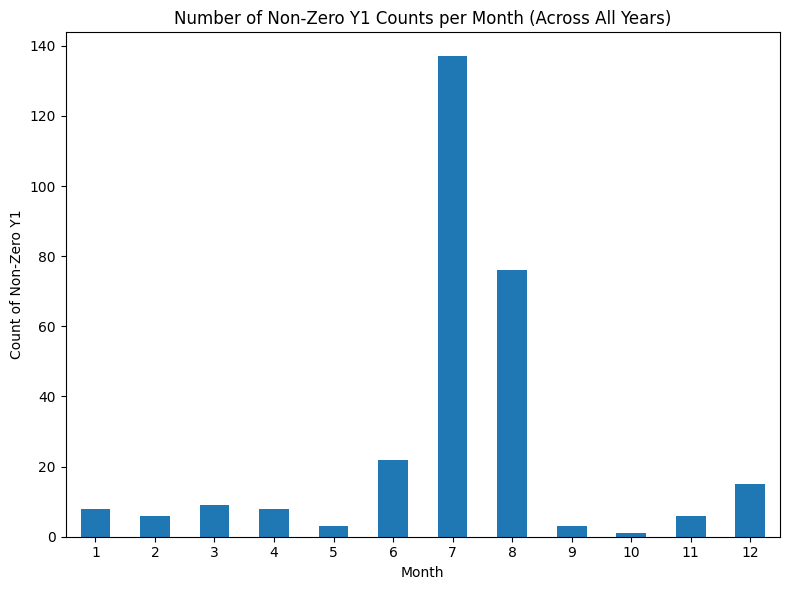

In [37]:
# we can verify this further by plotting the count of non zero Y1's accross the dataset

import pandas as pd
import matplotlib.pyplot as plt

features['time'] = pd.to_datetime(features['time'], format='%Y-%m-%d')

features['month'] = features['time'].dt.month

monthly_counts = features[features['Y1'] != 0].groupby('month')['Y1'].count()

plt.figure(figsize=(8,6))
monthly_counts.plot(kind='bar')
plt.title('Number of Non-Zero Y1 Counts per Month (Across All Years)')
plt.xlabel('Month')
plt.ylabel('Count of Non-Zero Y1')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


I hope we justified enough our threshhold for seperation, we will now create a new categorical features that takes either value yes (for presence of signal) or no (for absence of signal).

In [38]:
data=features.copy()
data['signal'] = data['Y1'].apply(lambda x: 'yes' if x > 0 else 'no')

## This is all we can do for the rest (I'll provide an exhaustive list of suggestions, all of which are useful to know and apply):
- Try simple logistic regression on just the parameters. Review the mathematics behind logistic regression, the assumptions it makes, and why it is an approach that reduces variance but increases bias (recap the bias-variance tradeoff).
- Try logistic regression with basis functions on the parameters (e.g., polynomial, Gaussian, sigmoid) to capture non-linearity.
- Add regularization techniques to the regression with basis functions (ridge, lasso, robust). Explain the specific advantages of each and revisit the underlying mathematics.
- Use ensemble methods:
  1. Review the theory behind decision trees, train a decision tree, and explain the bootstrapping technique.
  2. Explain how random forests combine decision trees and bootstrapping. Train a random forest.
  3. Review the concept of weak learners, discuss the theory behind gradient boosting, and then train and use an XGBoost model.
- Review the theory behind k-fold cross-validation and explain how it helps better estimate true risk (perhaps also explain the relationship between empirical risk and true risk). Mention grid search for hyperparameter tuning.
- After training all these models, it's likely that XGBoost will give the best result, potentially around 93% accuracy (give or take). However, we should question whether we are satisfied with this result. The data is highly imbalanced, so a naive model that always predicts "no signal" could still achieve 88% accuracy. This highlights the importance of using other metrics beyond accuracy, such as the area under the curve (AUC) or log loss.
- We should then explore methods that handle imbalanced data, such as customizing error metrics, data augmentation (though this may not be applicable here), and model calibration.

## The following is really extra:
- Given the time-dependent nature of the data and the goal of predicting whether a terminating glacier event will occur on a specific day, it may be appropriate to use lagging data (data from previous days) in our predictions. It is intuitive to think that glacier movement events are driven by changes in climate variables rather than the climate variables themselves at a single point in time.
- All the models mentioned above are "discriminative" models, which estimate $P(\texttt{Signal}\,|\, \texttt{Features})$. We could also study "generative" models that explore the joint distribution of the target and features, i.e., $P(\texttt{Signal}, \texttt{Features})$. This approach allows for the study of correlations and causal relationships between variables and between the target and features. Generative models often provide better interpretability.
